<a href="https://colab.research.google.com/github/cheng1610/sentiment-analysis/blob/main/sentiment-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

vocab_size = 20000
maxlen=300

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

word_index = imdb.get_word_index()

# print(word_index['the'])

index_word = {index+3: word for word, index in word_index.items()}

index_word[0] = "<PAD>"
index_word[1] = "<START>"
index_word[2] = "<UNK>"
index_word[3] = "<UNUSED>"

sample = x_test[:5]
# print(sample)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


In [57]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')  # 0~1
])


In [50]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [51]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 295s 923ms/step - accuracy: 0.6745 - loss: 0.5710 - val_accuracy: 0.7998 - val_loss: 0.4323
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 286s 912ms/step - accuracy: 0.8718 - loss: 0.3141 - val_accuracy: 0.8316 - val_loss: 0.3872
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 290s 928ms/step - accuracy: 0.9165 - loss: 0.2226 - val_accuracy: 0.8390 - val_loss: 0.3887
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 327s 944ms/step - accuracy: 0.9228 - loss: 0.2008 - val_accuracy: 0.8480 - val_loss: 0.3842
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 292s 933ms/step - accuracy: 0.9354 - loss: 0.1765 - val_accuracy: 0.8476 - val_loss: 0.4153


In [54]:
loss, acc = model.evaluate(x_test, y_test)
print(f"測試集準確率: {acc:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 112ms/step - accuracy: 0.8359 - loss: 0.4385
測試集準確率: 0.83


In [55]:
def decode(sequence: str) -> str:
    sequence = [i for i in sequence if i != 0]
    text =  " ".join([index_word.get(i, "?") for i in sequence])
    replaced = text.replace(
            "<START>", ""
        ).replace(
            "<UNK>", "something"
        ).replace(
            "br br", "\n"
        )
    return replaced.strip()

In [67]:
from dataclasses import dataclass
from typing import List

@dataclass
class ConvertResult:
    token: List[int]
    decode: str


In [68]:
sample = x_test[:5]
results = []

for seq in sample:
    text = decode(seq)
    results.append(ConvertResult(token=seq, decode=text))

# print(results[0].decode)
# print(results[1].decode)

pred = model.predict(sample)
print(pred)
pred_labels = (pred > 0.5).astype(int)
print(pred_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
[[0.49592468]
 [0.49848711]
 [0.5033573 ]
 [0.49682543]
 [0.5025959 ]]
[[0]
 [0]
 [1]
 [0]
 [1]]


{'accuracy': [0.7527499794960022, 0.8501999974250793, 0.8723000288009644, 0.8988999724388123, 0.8252000212669373], 'loss': [0.5006609559059143, 0.3549109995365143, 0.3086855113506317, 0.2536662220954895, 0.37715402245521545], 'val_accuracy': [0.7228000164031982, 0.8428000211715698, 0.847599983215332, 0.8230000138282776, 0.8497999906539917], 'val_loss': [0.5445313453674316, 0.3687853515148163, 0.3620075583457947, 0.42311036586761475, 0.35256609320640564]}


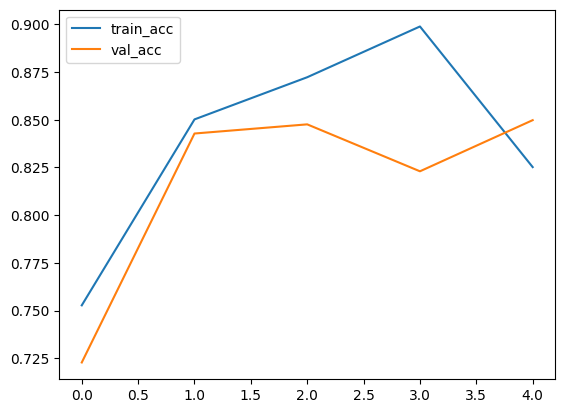

In [37]:
import matplotlib.pyplot as plt

print(history.history)

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
